# Customer Satisfaction Prediction for Invistico Airlines

In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data Collection
The data used in this project is the dataset of Invistico Airlines provided in the prompt. The dataset has 129879 rows and 23 columns. The columns are as follows:
- satisfaction: Whether the customer is satisfied or dissatisfied
- Gender: whether the customer is male or female
- Customer Type: whether the customer is loyal or disloyal
- Age: age of the customer
- Type of travel: whether the customer is travelling for business or personal reasons
- Class: class of the flight (business, eco, or eco plus)
- Flight Distance: distance of the flight
- Seat comfort: rating of seat comfort
- Departure/Arrival time convenient: rating of departure and arrival time convenience
- Food and drink: rating of food and drink
- Gate location: rating of gate location
- Inflight wifi service: rating of inflight wifi service
- Inflight entertainment: rating of inflight entertainment
- Online support: rating of online support
- Ease of online booking: rating of ease of online booking
- On-board service: rating of on-board service
- Leg room service: rating of leg room service
- Baggage handling: rating of baggage handling
- Check-in service: rating of check-in service
- Cleanliness: rating of cleanliness
- Online boarding: rating of online boarding
- Departure Delay in Minutes: delay in departure
- Arrival Delay in Minutes: delay in arrival

The data is stored in a CSV file name "Airline data.csv". The data is loaded into a pandas dataframe.

In [120]:
data = pd.read_csv(r'Arline data.csv', encoding='latin1')

## Data Preprocessing

The head, tail, and 5 rows in the middle of the dataframe are displayed. The data types of the columns are displayed. The number of missing values in each column is displayed.

In [121]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [122]:
data.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [123]:
data[len(data)//2:len(data)//2+5]

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
64940,satisfied,Female,Loyal Customer,16,Business travel,Eco Plus,3857,0,3,0,...,2,2,3,2,4,3,4,2,0,0.0
64941,satisfied,Female,Loyal Customer,44,Business travel,Business,3966,0,3,0,...,5,3,3,3,3,3,3,2,0,0.0
64942,satisfied,Male,Loyal Customer,14,Business travel,Eco,1520,0,3,0,...,5,5,4,3,2,5,2,5,18,16.0
64943,satisfied,Male,Loyal Customer,50,Business travel,Business,3954,0,3,0,...,5,1,1,1,1,4,1,2,0,0.0
64944,satisfied,Male,Loyal Customer,39,Business travel,Business,72,0,3,0,...,4,2,2,3,3,5,2,4,0,0.0


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [125]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [126]:
counts = data['satisfaction'].value_counts()
ratio = []
for i in counts:
    ratio.append(i/len(data))
string = ':'.join([str(round(elem, 2)) for elem in ratio])
print(f'Ratio of satisfaction to dissatisfaction is {string}')

Ratio of satisfaction to dissatisfaction is 0.55:0.45


The ratio of satisfied customers to dissatisfied customers is calculated. The ratio is 0.55:0.45. The data is slightly imbalanced. This may affect the performance of the model and at a later stage may require a balancing technique (e.g. oversampling, undersampling).

In [127]:
data.columns.to_list()

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

### Imputing Missing Values

In [128]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [129]:
(393/129880)*100

0.3025870033877425

There are missing values in the columns "Arrival Delay in Minutes". The missing values are only 393, which is approximately 0.3% of the total data. The missing values are imputed with the mean of the column. I decided to impute the missing values with the mean because the column is numerical and the missing values are very few so using the mean will not be numerically significant.

In [130]:
data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

In [131]:
data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## Feature Engineering (Augmentation)

I take a slight deviation from the data preprocessing, to examine if new features can be created from existing features. I do it at this stage so that the new features can be included in the data preprocessing steps. Also, I did this after imputing missing values so that the new features can be created using the imputed values and avoid division by zero errors or multiplication by zero /NaN.

Intuitively, the total delay in minutes can be calculated by adding the departure delay in minutes and the arrival delay in minutes. This new feature can be useful in predicting customer satisfaction. The new feature is added to the dataframe. Passengers experiencing long delays may have lower satisfaction.


In [132]:
data['Total Delay'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']

A new binary feature "Delay" is created. If either the "Arrival Delay in Minutes" or "Departure Delay in Minutes" is greater than 0, then the "Delay" feature is set to 1, otherwise 0.

In [133]:
data['Delay'] = data['Total Delay'].apply(lambda x: 1 if x > 0 else 0)

Additionally, agggregated ratings can be calculated by adding all the ratings columns. This new feature can be useful in predicting customer satisfaction. This can be separated into on-flight features, booking features, and ground features.

Ground Rating: Average ratings for Baggage handling, Checkin service, and Gate location. This may reflect satisfaction with ground services separately from in-flight experience.

Booking Rating: Average of Ease of Online booking, Online support, and Online boarding. This could capture the convenience of digital interactions.

In [134]:
data['On-Flight Rating'] = data['Inflight entertainment'] + data['Seat comfort'] + data['Food and drink'] + data['Inflight wifi service'] + data['Cleanliness'] + data['Leg room service']
data['On-Flight Rating'] = data['On-Flight Rating']/6

data['Booking Rating'] = data['Ease of Online booking'] + data['Online boarding'] + data['Online support']
data['Booking Rating'] = data['Booking Rating']/3

data['Ground Rating'] = data['Baggage handling'] + data['Checkin service'] + data['Gate location']
data['Ground Rating'] = data['Ground Rating']/3

data['Rating'] = data['On-Flight Rating'] + data['Booking Rating'] + data['Ground Rating']
data['Rating'] = data['Rating']/3

Also, computing delay per distance can be useful because being delayed for a long time on a short distance flight may be more frustrating than being delayed for the same time on a long distance flight. This new feature is added to the dataframe.

In [135]:
data['Delay Proportion'] = data['Total Delay']/data['Flight Distance']

Another augmented feature is age group. The age of the passengers can be grouped into age groups. This can be useful in predicting customer satisfaction as different age groups may have varying expectations and tolerance levels. The age groups are as follows:
- <= 20
- 21-40
- 41-60
- => 60

In [136]:
data['Age Group'] = data['Age'].apply(lambda x: '0-20' if x <= 20 else '21-40' if x <= 40 else '41-60' if x <= 60 else '61-100')

To capture any age-based differences in satisfaction, the age is multiplied by the average rating eature created earlier. This new feature is added to the dataframe.

In [137]:
data['Age_Satisfaction'] = data['Rating'] * data['Age']

Another thing to note is that if seats are uncomfortable, AND the flight is long, the passenger may be more dissatisfied. Long flights with poor comfort may weigh more heavily on satisfaction than short flights with similar comfort levels. This can be captured by dividing the seat comfort rating by the flight distance. This new feature is added to the dataframe.

In [138]:
data['Comfort to Distance'] = data['Seat comfort']/data['Flight Distance']

The difference between the departure and arrival delay can be calculated. A long departure delay with an on-time arrival could be a positive sign of efficient recovery during the flight which customers may appreciate.

In [139]:
data['Arrival-Departure-Delay'] = data['Arrival Delay in Minutes'] - data['Departure Delay in Minutes']

In [140]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Delay,On-Flight Rating,Booking Rating,Ground Rating,Rating,Delay Proportion,Age Group,Age_Satisfaction,Comfort to Distance,Arrival-Departure-Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,1.500000,2.333333,3.333333,2.388889,0.000000,61-100,155.277778,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,1,1.500000,2.333333,3.000000,2.277778,0.249594,41-60,107.055556,0.0,-5.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,1.500000,2.000000,3.666667,2.388889,0.000000,0-20,35.833333,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1.333333,2.333333,2.666667,2.111111,0.000000,41-60,126.666667,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,1.500000,3.666667,3.000000,2.722222,0.000000,61-100,190.555556,0.0,0.0


In [141]:
data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype == 'float' or x.dtype == 'int' else x)

In [142]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Delay,On-Flight Rating,Booking Rating,Ground Rating,Rating,Delay Proportion,Age Group,Age_Satisfaction,Comfort to Distance,Arrival-Departure-Delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0,1.500000,2.333333,3.333333,2.388889,0.000000,61-100,155.277778,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,1,1.500000,2.333333,3.000000,2.277778,0.249594,41-60,107.055556,0.0,-5.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,1.500000,2.000000,3.666667,2.388889,0.000000,0-20,35.833333,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0,1.333333,2.333333,2.666667,2.111111,0.000000,41-60,126.666667,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0,1.500000,3.666667,3.000000,2.722222,0.000000,61-100,190.555556,0.0,0.0


In [143]:
data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Total Delay                          0
Delay                                0
On-Flight Rating         

## Data Preprocessing (Continued)

### Encoding Categorical Variables

I opted to use a OneHotEncoder to encode the categorical variables, except for the "satisfaction" column. The "satisfaction" column is the target variable and is encoded using a LabelEncoder.

I chose the OneHotEncoder because it is suitable for encoding categorical variables with more than two categories. The OneHotEncoder creates a binary column for each category in the categorical variable. This is useful for columns like the "Class" column, which has three categories (business, eco, eco plus). The OneHotEncoder will create three columns, one for each category. It looks like this:

- business: 1 if the class is business
- eco: 1 if the class is eco
- eco plus: 1 if the class is eco plus

So a row with the class "business" will have the following values in the "Class" columns:
| Class_business | Class_eco | Class_eco plus
|-----------------|-----------|-----------------
| 1 | 0 | 0

Had I used a LabelEncoder, the "Class" column would have been encoded as follows:
- business: 0
- eco: 1
- eco plus: 2
So a row with the class "business" would have the following value in the "Class" column:

| Class |
|-------|
| 0     |

Even though that is the only column with more than two categories, I decided to use the OneHotEncoder for all the categorical variables to maintain consistency. Also, the model's accuracy improved by 3% when using the OneHotEncoder compared to the LabelEncoder.

Although the OneHotEncoder is suitable for encoding categorical variables with more than two categories, it is not suitable for encoding the target variable. The target variable has two categories (satisfied, dissatisfied). I use a lambda function to map the "satisfied" category to 1 and the "dissatisfied" category to 0.

In [144]:
cat_data = data.select_dtypes(include=['object'])
data = data.drop(cat_data.columns, axis=1)

In [145]:
cat_data.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Age Group
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,61-100
1,satisfied,Male,Loyal Customer,Personal Travel,Business,41-60
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0-20
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,41-60
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,61-100


In [146]:
cat_data.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class,Age Group
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,61-100
1,satisfied,Male,Loyal Customer,Personal Travel,Business,41-60
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0-20
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,41-60
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,61-100


In [147]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   satisfaction    129880 non-null  object
 1   Gender          129880 non-null  object
 2   Customer Type   129880 non-null  object
 3   Type of Travel  129880 non-null  object
 4   Class           129880 non-null  object
 5   Age Group       129880 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [148]:
cat_data.nunique()

satisfaction      2
Gender            2
Customer Type     2
Type of Travel    2
Class             3
Age Group         4
dtype: int64

In [149]:
cat_data.columns.to_list()

['satisfaction',
 'Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Age Group']

In [150]:
satisfactions = cat_data['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0})
satisfactions = satisfactions.to_frame(name='satisfaction')
satisfactions.head()

C:\Users\egale\AppData\Local\Temp\ipykernel_15236\910574737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  satisfactions = cat_data['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0})


,satisfaction
0,1
1,1
2,1
3,1
4,1


In [151]:
satisfactions.shape

(129880, 1)

In [152]:
cat_data = cat_data.drop('satisfaction', axis=1)

In [153]:
satisfactions.head()

,satisfaction
0,1
1,1
2,1
3,1
4,1


In [154]:
cat_data.head()

,Gender,Customer Type,Type of Travel,Class,Age Group
0,Female,Loyal Customer,Personal Travel,Eco,61-100
1,Male,Loyal Customer,Personal Travel,Business,41-60
2,Female,Loyal Customer,Personal Travel,Eco,0-20
3,Female,Loyal Customer,Personal Travel,Eco,41-60
4,Female,Loyal Customer,Personal Travel,Eco,61-100


In [155]:
satisfactions.ndim

2

In [156]:
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(cat_data)

OneHotEncoder()

In [157]:
encoded_data = one_hot_enc.transform(cat_data).toarray()

n_ary_data = pd.DataFrame(encoded_data, columns=one_hot_enc.get_feature_names_out())

n_ary_data.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age Group_0-20,Age Group_21-40,Age Group_41-60,Age Group_61-100
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [158]:
n_ary_data.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age Group_0-20,Age Group_21-40,Age Group_41-60,Age Group_61-100
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [159]:
n_ary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Gender_Female                    129880 non-null  float64
 1   Gender_Male                      129880 non-null  float64
 2   Customer Type_Loyal Customer     129880 non-null  float64
 3   Customer Type_disloyal Customer  129880 non-null  float64
 4   Type of Travel_Business travel   129880 non-null  float64
 5   Type of Travel_Personal Travel   129880 non-null  float64
 6   Class_Business                   129880 non-null  float64
 7   Class_Eco                        129880 non-null  float64
 8   Class_Eco Plus                   129880 non-null  float64
 9   Age Group_0-20                   129880 non-null  float64
 10  Age Group_21-40                  129880 non-null  float64
 11  Age Group_41-60                  129880 non-null  float64
 12  Ag

### Standardizing or Normalizing Numerical Variables (Scaling)

In [160]:
data.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Total Delay,Delay,On-Flight Rating,Booking Rating,Ground Rating,Rating,Delay Proportion,Age_Satisfaction,Comfort to Distance,Arrival-Departure-Delay
0,65,265,0,0,0,2,2,4,2,3,...,0.0,0,1.500000,2.333333,3.333333,2.388889,0.000000,155.277778,0.0,0.0
1,47,2464,0,0,0,3,0,2,2,3,...,615.0,1,1.500000,2.333333,3.000000,2.277778,0.249594,107.055556,0.0,-5.0
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,0,1.500000,2.000000,3.666667,2.388889,0.000000,35.833333,0.0,0.0
3,60,623,0,0,0,3,3,4,3,1,...,0.0,0,1.333333,2.333333,2.666667,2.111111,0.000000,126.666667,0.0,0.0
4,70,354,0,0,0,3,4,3,4,2,...,0.0,0,1.500000,3.666667,3.000000,2.722222,0.000000,190.555556,0.0,0.0


To choose between standardizing or normalizing the numerical variables, I used the Kashpirovsky criterion. The Kashpirovsky criterion states that if the data is normally distributed, then standardizing is preferred. If the data is not normally distributed, then normalizing is preferred. I checked the distribution of the numerical variables using the Kashpirosky test. The test showed that the data is not normally distributed.

In [161]:
for column in data.columns:
    feature = data[column].dropna()
    stat, p = stats.kstest(feature, 'norm', args=(feature.mean(), feature.std()))
    print(f'Feature: {column}')
    print(f'Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print('Result: Data is Gaussian\n')
    else:
        print('Result: Data is not Gaussian\n')

Feature: Age
Statistics=0.055, p-value=0.000
Result: Data is not Gaussian

Feature: Flight Distance
Statistics=0.047, p-value=0.000
Result: Data is not Gaussian

Feature: Seat comfort
Statistics=0.154, p-value=0.000
Result: Data is not Gaussian

Feature: Departure/Arrival time convenient
Statistics=0.180, p-value=0.000
Result: Data is not Gaussian

Feature: Food and drink
Statistics=0.153, p-value=0.000
Result: Data is not Gaussian

Feature: Gate location
Statistics=0.159, p-value=0.000
Result: Data is not Gaussian

Feature: Inflight wifi service
Statistics=0.180, p-value=0.000
Result: Data is not Gaussian

Feature: Inflight entertainment
Statistics=0.229, p-value=0.000
Result: Data is not Gaussian

Feature: Online support
Statistics=0.237, p-value=0.000
Result: Data is not Gaussian

Feature: Ease of Online booking
Statistics=0.227, p-value=0.000
Result: Data is not Gaussian

Feature: On-board service
Statistics=0.221, p-value=0.000
Result: Data is not Gaussian

Feature: Leg room servi

### Approach 1: Standardization
One effective approach to preparing numerical columns is to standardize them by centering and scaling. This technique ensures that all numerical features operate on the same scale, which is particularly suitable for datasets that follow a Gaussian (normal) distribution. The standardization process is performed using the following formula:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $ z $ is the standardized value.
- $ x $ is the original data point.
- $ \mu $ represents the mean of the column.
- $ \sigma $ is the standard deviation of the column.

By applying this transformation, the numerical data is adjusted to have a mean of zero and a standard deviation of one, facilitating more effective performance of algorithms that assume normally distributed input features.

### Approach 2: Normalization
Normalization is another common technique used to prepare numerical data for machine learning algorithms. This process scales the numerical data to a fixed range, typically between 0 and 1. Normalization is particularly useful when the numerical features do not follow a Gaussian distribution. The normalization process is performed using the following formula:

$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

Where:
- $ x_{norm} $ is the normalized value.
- $ x $ is the original data point.
- $ x_{min} $ represents the minimum value of the column.
- $ x_{max} $ is the maximum value of the column.

By applying this transformation, the numerical data is adjusted to a common scale, ensuring that all features contribute equally to the model's learning process.

### Approach Chosen: Normalization

The best approach to use in this case is normalization as it is shown that columns do not follow a Gaussian distribution.

In [162]:
data = (data - data.min()) / (data.max() - data.min())

In [163]:
data.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Total Delay,Delay,On-Flight Rating,Booking Rating,Ground Rating,Rating,Delay Proportion,Age_Satisfaction,Comfort to Distance,Arrival-Departure-Delay
0,0.743590,0.031155,0.0,0.0,0.0,0.4,0.4,0.8,0.4,0.6,...,0.00000,0.0,0.222222,0.384615,0.583333,0.364865,0.000000,0.393917,0.0,0.687545
1,0.512821,0.349804,0.0,0.0,0.0,0.6,0.0,0.4,0.4,0.6,...,0.19364,1.0,0.222222,0.384615,0.500000,0.337838,0.062993,0.265134,0.0,0.680869
2,0.102564,0.302565,0.0,0.0,0.0,0.6,0.4,0.0,0.4,0.4,...,0.00000,0.0,0.222222,0.307692,0.666667,0.364865,0.000000,0.074926,0.0,0.687545
3,0.679487,0.083031,0.0,0.0,0.0,0.6,0.6,0.8,0.6,0.2,...,0.00000,0.0,0.185185,0.384615,0.416667,0.297297,0.000000,0.317507,0.0,0.687545
4,0.807692,0.044052,0.0,0.0,0.0,0.6,0.8,0.6,0.8,0.4,...,0.00000,0.0,0.222222,0.692308,0.500000,0.445946,0.000000,0.488131,0.0,0.687545


In [164]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Total Delay,Delay,On-Flight Rating,Booking Rating,Ground Rating,Rating,Delay Proportion,Age_Satisfaction,Comfort to Distance,Arrival-Departure-Delay
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.415743,0.279874,0.567719,0.598129,0.570399,0.598084,0.649826,0.676695,0.703941,0.694421,...,0.009384,0.543032,0.611661,0.641877,0.585575,0.598074,0.005638,0.333882,0.026975,0.688049
std,0.193838,0.148836,0.278597,0.305445,0.288746,0.261194,0.263764,0.269212,0.261302,0.261112,...,0.023840,0.498147,0.171873,0.264222,0.190544,0.168560,0.021284,0.159336,0.054978,0.014389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.189683,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.600000,0.400000,...,0.000000,0.000000,0.481481,0.461538,0.500000,0.472973,0.000000,0.206825,0.008239,0.684875
50%,0.423077,0.271700,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,0.800000,...,0.000630,1.000000,0.629630,0.692308,0.583333,0.608108,0.000261,0.323145,0.014520,0.687545
75%,0.564103,0.361397,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,1.000000,...,0.007557,1.000000,0.740741,0.846154,0.750000,0.729730,0.003633,0.450148,0.024155,0.687545
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that the data is preprocessed appropriately (encoding of categorical data and standardization of numerical values), the separate datasets are put back together.

In [165]:
satisfactions = pd.DataFrame(satisfactions, columns=['satisfaction'])

In [166]:
satisfactions.head()

,satisfaction
0,1
1,1
2,1
3,1
4,1


In [167]:
data = pd.concat([data, n_ary_data, satisfactions], axis=1)

In [168]:
data.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age Group_0-20,Age Group_21-40,Age Group_41-60,Age Group_61-100,satisfaction
0,0.743590,0.031155,0.0,0.0,0.0,0.4,0.4,0.8,0.4,0.6,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.512821,0.349804,0.0,0.0,0.0,0.6,0.0,0.4,0.4,0.6,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.102564,0.302565,0.0,0.0,0.0,0.6,0.4,0.0,0.4,0.4,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,0.679487,0.083031,0.0,0.0,0.0,0.6,0.6,0.8,0.6,0.2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0.807692,0.044052,0.0,0.0,0.0,0.6,0.8,0.6,0.8,0.4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


## Exploratory Data Analysis

To gain insights into the data, I perform exploratory data analysis. I analyze the distribution of the target variable, the distribution of numerical features, and the relationship between the target variable and other features.

This process would also enable me to be selective about the features to include in the model. I can identify features that have a strong correlation with customer satisfaction and exclude those that have little impact to improve the model's performance. Also, it would be computationally efficient to work with fewer features.

I visualize the distribution of the target variable using a count plot. This plot shows the number of satisfied and dissatisfied customers in the dataset. The plot reveals that the dataset is slightly imbalanced, with more satisfied customers than dissatisfied customers.

In [169]:
data[satisfactions.columns] = data[satisfactions.columns].astype('int')

In [170]:
data[satisfactions.columns].head()

,satisfaction
0,1
1,1
2,1
3,1
4,1


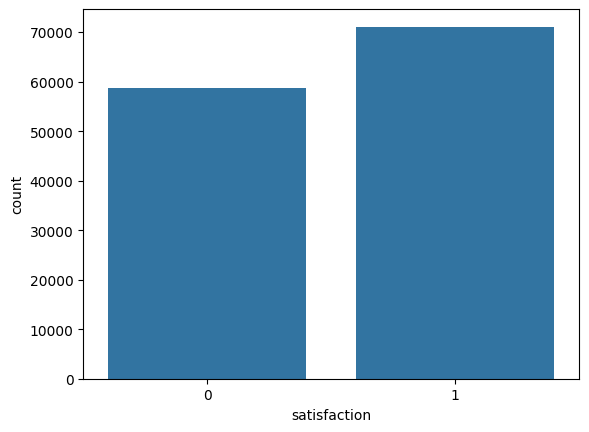

In [171]:
sns.countplot(x='satisfaction', data=data)
plt.show()

Since the dataset is unbalanced, I decided to modify the threshold for the classification model. The threshold is the probability value above which a customer is classified as satisfied. The default threshold is 0.5, but I decided to change it to 0.55, as that is the ratio of satisfied customers to dissatisfied customers in the dataset. This would help to balance the classification model.

I also explored the correlation between the target variable and the features. I first calculated the correlation matrix between the target variable and the features. Then, I visualized the correlation using a heatmap. The heatmap shows the correlation coefficients between the target variable and the features. This helps to identify features that have a strong correlation with customer satisfaction.

In [172]:
corr = data.corr()
corr = corr['satisfaction'].sort_values(ascending=False)
corr

satisfaction                         1.000000
Inflight entertainment               0.523496
Rating                               0.519151
On-Flight Rating                     0.475953
Booking Rating                       0.440361
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Age_Satisfaction                     0.345362
Online boarding                      0.338147
Class_Business                       0.311912
Leg room service                     0.304928
Customer Type_Loyal Customer         0.292592
Ground Rating                        0.271530
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Gender_Female                        0.212236
Age Group_41-60                      0.191445
Comfort to Distance               

To ensure all features are correlated in terms of their magnitude only, not their direction, I used the absolute value of the correlation coefficients. This way, I can identify features that have a strong positive or negative correlation with customer satisfaction.

In [173]:
corr = corr.apply(lambda x: abs(x))
corr = corr.sort_values(ascending=False)
corr


satisfaction                         1.000000
Inflight entertainment               0.523496
Rating                               0.519151
On-Flight Rating                     0.475953
Booking Rating                       0.440361
Ease of Online booking               0.431772
Online support                       0.390143
On-board service                     0.352047
Age_Satisfaction                     0.345362
Online boarding                      0.338147
Class_Business                       0.311912
Leg room service                     0.304928
Customer Type_Loyal Customer         0.292592
Customer Type_disloyal Customer      0.292592
Class_Eco                            0.278062
Ground Rating                        0.271530
Checkin service                      0.266179
Baggage handling                     0.260347
Cleanliness                          0.259330
Seat comfort                         0.242384
Inflight wifi service                0.227062
Gender_Female                     

Some of the augmented features created earlier emerge as having a strong correlation with customer satisfaction suggesting that the deviation earlier was useful.

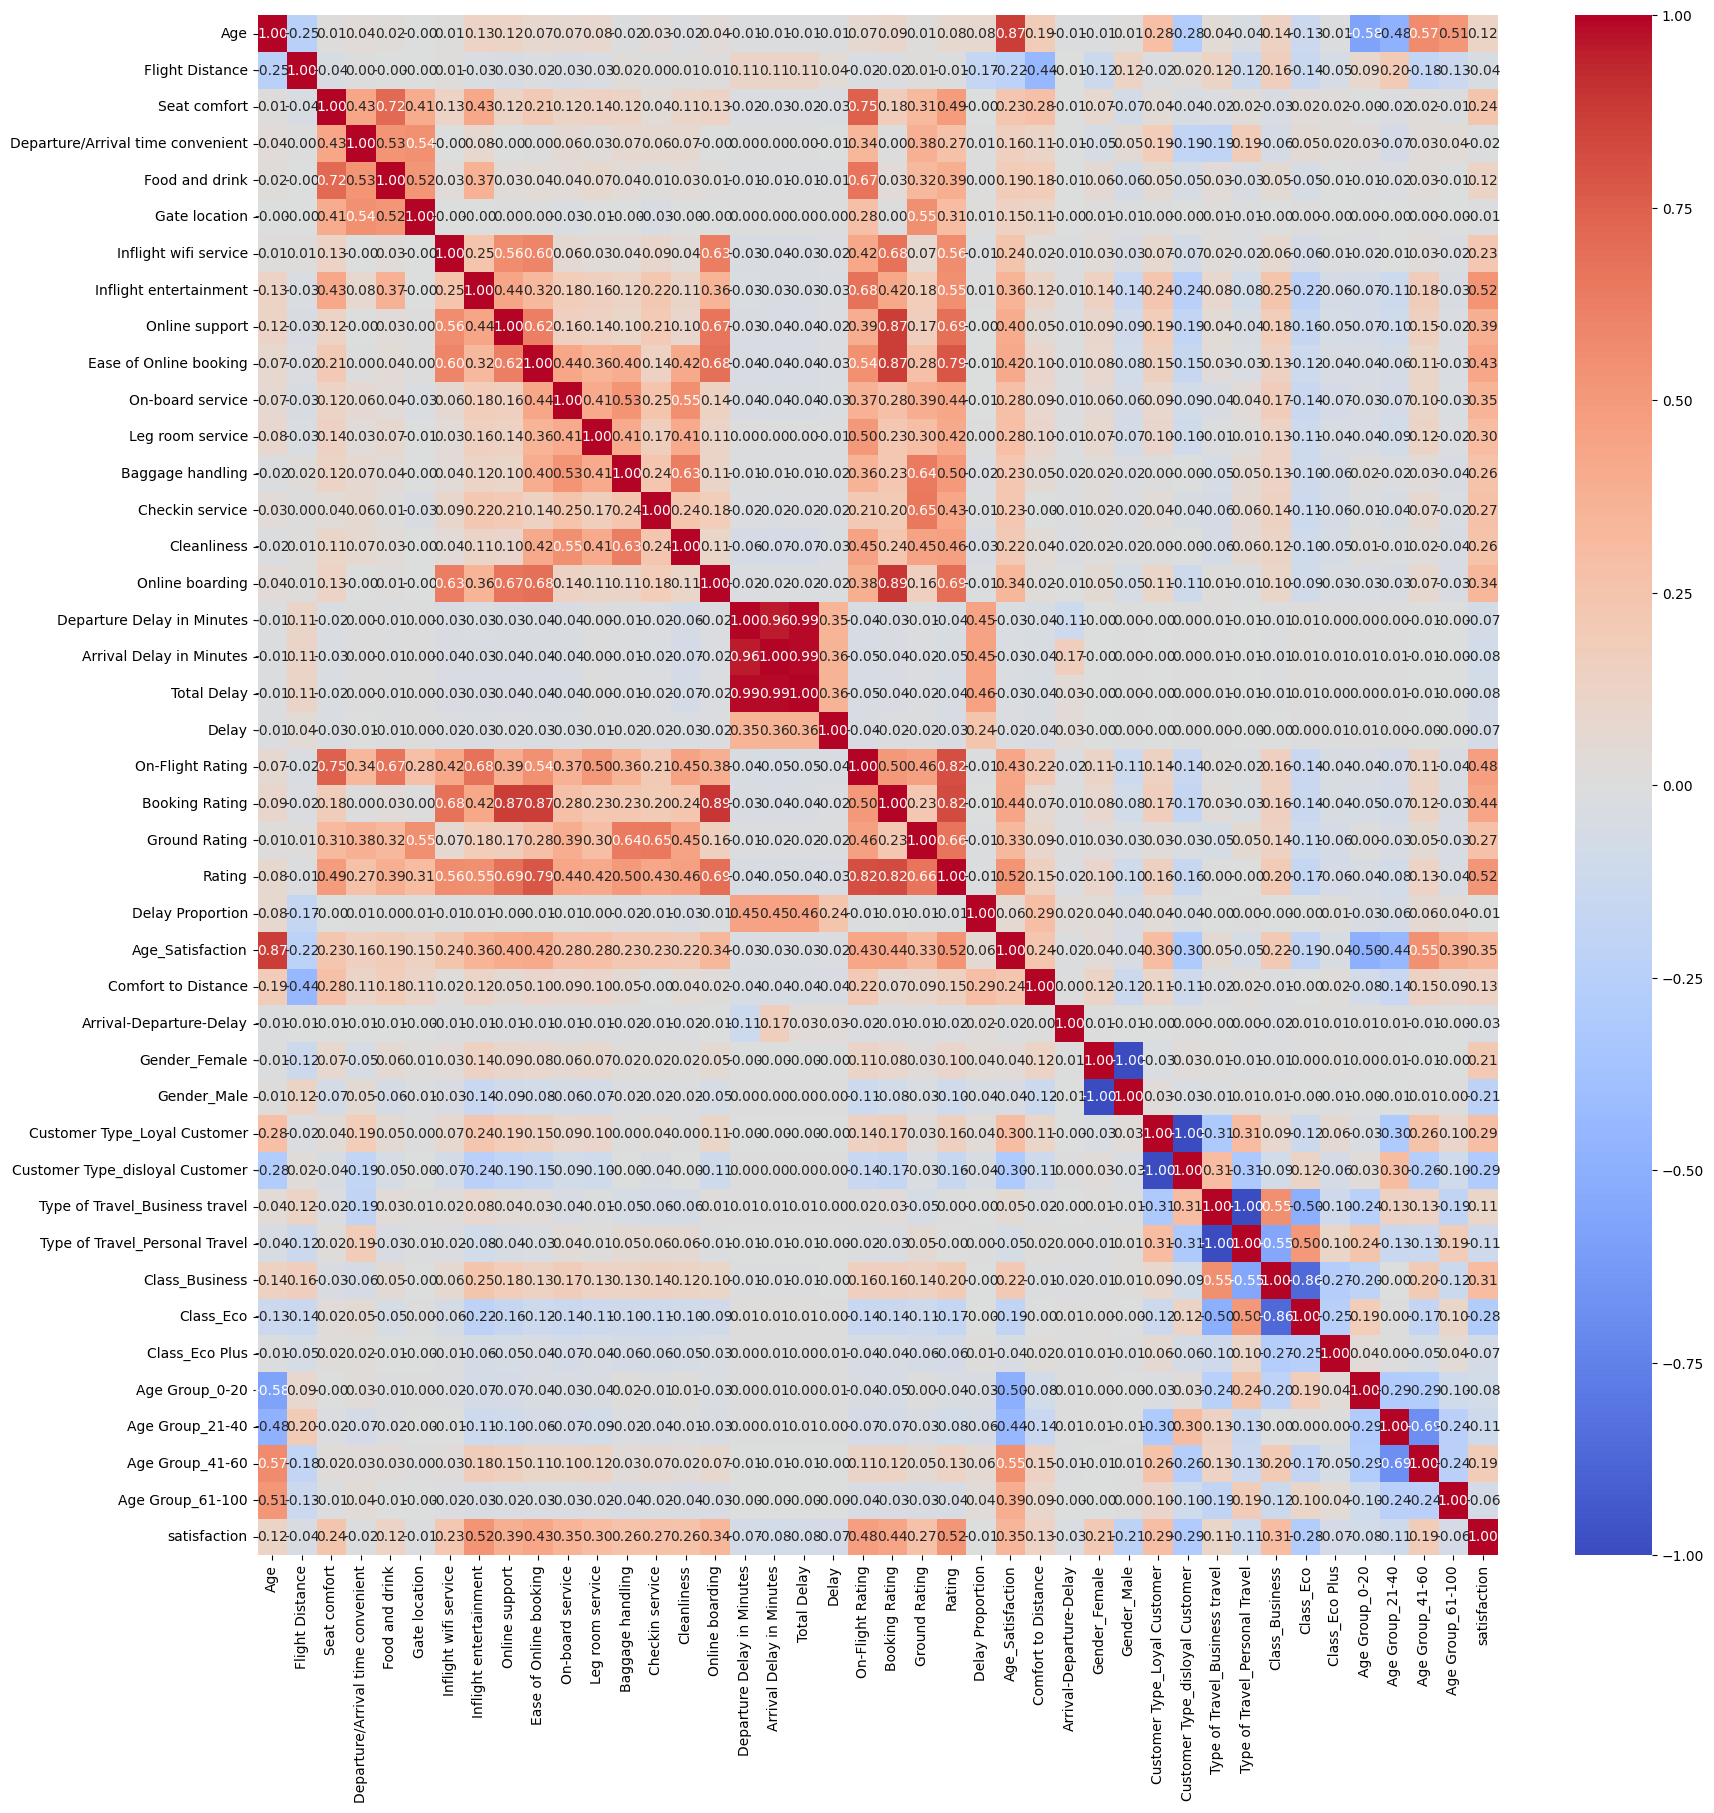

In [174]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Model Building

Now that the data is in appropriate form for model training, the data is split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate the model. The target variable is the "satisfaction" column. The data is split into 80% training and 20% testing.

#### Logistic Regression
A logistic regression model is built to predict customer satisfaction. A logistic regression model is an example of a discriminative model that is used for binary classification tasks. It models the probability that a given input belongs to a particular class. It computes the probability of the target variable being satisfied or dissatisfied based on the input features. It does this by first computing the optimal weights for the input features using a batch gradient descent and then applying a sigmoid function to the weighted sum of the input features. Log likelihood is used in computing the probabilities. In this case, the logistic regression model predicts the probability that a customer is satisfied or dissatisfied based on the input features.

The main methods of the logistic classifier model are:
- `__init__(self, learning_rate, num_iterations)`: This method initializes the logistic regression model with the specified learning rate and number of iterations. The learning rate controls the step size in the gradient descent optimization algorithm, while the number of iterations determines the number of times the model updates the weights to minimize the loss function. It also initializes the weights to `None`.
- `load(dataframe, target_column, test_size, random_state, shuffle)`: This method loads the data, splits it into training and testing sets, and sets the instance attributes (X_train, X_test, y_train, y_test).
- `__sigmoid(self, z)`: This method computes the sigmoid function of the input \( z \). The sigmoid function maps any real number to the range [0, 1]. It is used to convert the weighted sum of the input features to a probability value. To ensure numerical stability, a variant of the sigmoid function is used that avoids overflow or underflow errors. The formula for the sigmoid function is:
  $$\text{sigmoid}(z) = \frac{1}{1 + \exp(-z)} \quad \text{for} \quad z \geq 0$$
  and
  $$\text{sigmoid}(z) = \frac{\exp(z)}{1 + \exp(z)} \quad \text{for} \quad z < 0$$
  - `__initialize_weights(self, n_features)`: This method initializes the weights of the logistic regression model. The weights are initialized to zero. The number of weights is equal to the number of features in the input data plus 1 for the bias term.
  - `__add_bias(self, X)`: This method adds a bias term to the input features. The bias term is a constant value that allows the model to capture patterns in the data that do not pass through the origin. It is added as an additional feature with a constant value of 1.
  - `train():` This method trains the logistic regression model using batch gradient descent. It computes the optimal weights that minimize the log likelihood loss function. The log likelihood loss function is used to measure the error between the predicted probabilities and the actual target values. The weights are updated iteratively using the gradient of the loss function with respect to the weights. The update rule for the weights is given by:
    $$ w = w - \alpha \nabla L(w) $$
    where:
    - $ w $ is the weight vector.
    - $ \alpha $ is the learning rate.
    - $ \nabla L(w) $ is the gradient of the loss function with respect to the weights.
- `__gradint_descend(self, X, y)`: This method performs one step of gradient descent to update the weights. It computes the gradient of the log likelihood loss function with respect to the weights. The gradient is used to update the weights in the direction that minimizes the loss function. The formula for the gradient of the log likelihood loss function is:
  $$ \nabla L(w) = X^T (\sigma(Xw) - y) $$
  where:
  - $ X $ is the matrix of input features.
  - $ y $ is the vector of target values.
  - $ w $ is the weight vector.
  - $ \sigma(Xw) $ is the vector of predicted probabilities.
- `predict_class(self, X)`: This method predicts the class labels (satisfied or dissatisfied) for the input features. It computes the probability that the input belongs to the positive class (satisfied) and compares it to a threshold to determine the predicted class label. The threshold is set to 0.55 to balance the classification model.
- `evaluate(self, metric)`: This method evaluates the logistic regression model using the specified metric. The metric can be accuracy, precision, recall, or F1 score. It computes the metric on the testing set and returns the value. Currently, the model is evaluated using accuracy. It compares the predicted class labels to the actual class labels and computes the percentage of correct predictions. This is compared to the baseline model to determine the model's performance, i.e. we imagine a model that predicts the majority class all the time.

In [175]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

class LogisticClassifier:
    """
    This class is an implementation of the logistic regression algorithm. 
    
    As already explained above, it uses a gradient
    descent algorithm to minimize the cost function and find the optimal weights for the model. Using these weights,
    the model can predict the class of a given input. Predictions calculated using the weights are continuous values
    between 0 and 1. To convert these continuous values to binary predictions, a sigmoid function is used. If the value
    is greater than or equal to the threshold, the prediction is 1 (positive class), otherwise, it is 0 (negative class).
    A numerically stable version of the sigmoid function is used to avoid overflow and underflow errors. The model also incorporates 
    early stopping to prevent overfitting.
    """
    def __init__(self, learning_rate: float = 0.01, num_iterations: int = 10000):
        """
        Initializes the logistic regression model with the given learning rate and number of iterations.
        Sets the weights to None initially. The weights will be initialized and trained when the train method is called.

        Parameter:
        - learning_rate (float): The learning rate to be used for the gradient descent algorithm.
        - num_iterations (int): The number of iterations to run the gradient descent algorithm.

        Raise:
        - ValueError: If the number of iterations is less than or equal to 0.
        """
        if num_iterations <= 0:
            raise ValueError("Number of iterations must be a positive integer.")
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.X_train, self.y_train = None, None
        self.X_test, self.y_test = None, None

    def load(self, data, target, frac=0.8, random_state=9, shuffle=True):
        """
        Loads the data and split it into training and testing sets. It uses the train_test_split function from
        scikit-learn to perform the splitting.

        Assumption:
        - The data is already preprocessed and does not contain any missing values.
        - The target column is already encoded.
        - The data is already normalized.
        - The train_test_split function has been imported from scikit-learn.

        Parameter:
        - data (pd.DataFrame): The input data to be used for training and testing.
        - target (str): The target column to predict.
        - frac (float): The fraction of the data to be used for training. Default is 0.8.
        - random_state (int): The random state to be used for splitting the data. Default is 9.
        - shuffle (bool): Whether to shuffle the data before splitting. Default is True.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            data.drop(target, axis=1), data[target], test_size=1 - frac, 
            random_state=random_state, shuffle=shuffle
        )

    def __sigmoid(self, z: float) -> float:
        """
        Calculates the sigmoid value of the given input using a numerically stable version of the sigmoid function.

        Parameter:
        - z (float): The input value to calculate the sigmoid for.

        Return:
        - float: The sigmoid value of the input.
        """
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

    def __initialize_parameters(self, n_features: int) -> None:
        """
        Initializes the weights for the logistic regression model. The weights are initialized to zeros. The number of
        weights is equal to the number of features plus one (for the bias term).

        Parameter:
        - n_features (int): The number of features in the training
        """
        self.weights = np.zeros(n_features + 1)

    def __add_bias(self, X) -> np.array:
        """
        Adds a bias term (intercept) to the input data. A column of ones is added to the input matrix X.

        Parameter:
        - X (np.array): The input data matrix.

        Return:
        - np.array: The input data matrix with a bias term added.
        """
        return np.insert(X, 0, 1, axis=1)

    def train(self) -> None:
        """
        Trains the logistic regression model using the training data. It initializes the parameters and performs
        gradient descent to find the optimal weights for the model. The weights are stored in the weights attribute.
        It calls the __add_bias, __initialize_parameters and __gradient_descent methods internally to achieve this.

        Raise:
        - ValueError: If the training data is not loaded.
        """
        if self.X_train is None or self.y_train is None:
            raise ValueError("Training data not loaded.")
        
        self.X_train = self.__add_bias(self.X_train)
        self.__initialize_parameters(self.X_train.shape[1] - 1)
        self.__gradient_descent()
        
        
    def __gradient_descent(self) -> None:
        """
        Performs the gradient descent algorithm to find the optimal weights for the logistic regression model.
        It iteratively updates the weights using the gradient of the cost function with respect to the weights.
        The cost function used is the binary cross-entropy loss. The process is repeated for the specified number
        of iterations or until convergence.

        The weights are updated using the formula:
        weights = weights - learning_rate * gradient

        The convergence criterion is based on the change in cost between iterations. If the change in cost is less
        than a small value (1e-6), the algorithm stops early to prevent overfitting.

        The cost function is given by:
        cost = -1/m * sum(y * log(h) + (1 - y) * log(1 - h))

        where:
        - m is the number of training examples
        - y is the actual target value (0 or 1)
        - h is the predicted value (probability of class 1)
        """
        prev_cost = float('inf')
        for i in range(self.num_iterations):
            z = np.dot(self.X_train, self.weights)
            h = self.__sigmoid(z)
            gradient = np.dot(self.X_train.T, (h - self.y_train)) / self.y_train.size
            self.weights -= self.learning_rate * gradient

            cost = -np.mean(self.y_train * np.log(h) + (1 - self.y_train) * np.log(1 - h))
            if np.abs(prev_cost - cost) < 1e-6:
                print(f"Early stopping at iteration {i+1}")
                break
            prev_cost = cost
        

    def predict_class(self, threshold=0.55) -> np.array:
        """
        Predicts the class of the test data using the logistic regression model. It converts the continuous predictions
        to binary predictions using the specified threshold. If the predicted value is greater than or equal to the
        threshold, the prediction is 1 (positive class), otherwise it is 0 (negative class).

        Parameter:
        - threshold (float): The threshold value to convert the continuous predictions to binary predictions.
        - X_in (np.array): The input data to predict the class for. If None, the test data is used.

        Return:
        - np.array: The binary predictions for the test data.
        """

        if self.weights is None:
            raise ValueError("Weights not initialized.")
        X_test_bias = self.__add_bias(self.X_test)
        return (self.__sigmoid(np.dot(X_test_bias, self.weights)) >= threshold).astype(int)

    def evaluate(self, metric='accuracy') -> float:
        """
        Evaluates the logistic regression model using the specified metric on the test data. The available metrics are:
        - accuracy: The proportion of correctly predicted classes.
        
        Parameter:
        - metric (str): The evaluation metric to use. Default is 'accuracy'.

        Return:
        - float: The value of the evaluation metric on the test data.
        """
        y_pred = self.predict_class()
        
        if metric == 'accuracy':
            model_accuracy = np.mean(y_pred == self.y_test) * 100
            
            majority_class = np.bincount(self.y_test).argmax()
            baseline_accuracy = np.mean(self.y_test == majority_class) * 100
            
            print(f"Model Accuracy: {model_accuracy:.2f}%")
            print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.2f}%")
            
            return model_accuracy
        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
    def predict(self, X_in: pd.DataFrame, threshold=0.55) -> np.array:
        """
        Predicts the class of the input data using the logistic regression model. It converts the continuous predictions
        to binary predictions using the specified threshold. If the predicted value is greater than or equal to the
        threshold, the prediction is 1 (positive class), otherwise it is 0 (negative class).

        Parameter:
        - X_in (pd.DataFrame): The input data to predict the class for.

        Return:
        - np.array: The binary predictions for the input data.
        """
        if self.weights is None:
            raise ValueError("Weights not initialized.")
        
        X_in = self.__add_bias(X_in)
        return (self.__sigmoid(np.dot(X_in, self.weights)) >= threshold).astype(int)

        

### Linear Discriminant Analysis (LDA) Classifier
The LinearDiscriminantClassifier class implements a Linear Discriminant Analysis (LDA) classifier. LDA is a technique used for dimensionality reduction and classification. It projects the data onto a lower-dimensional space while maximizing the separation between different classes. This classifier is particularly useful when the classes are linearly separable as is the case with the classification problem in this project.

#### Rationale for Choosing LDA
LDA is chosen for its ability to reduce the dimensionality of the data while preserving as much class discriminatory information as possible. It is particularly effective when the classes are linearly separable and the data follows a Gaussian distribution with equal covariance matrices for each class. LDA is computationally efficient and provides interpretable results, making it a popular choice for classification tasks. Even though the data is not normally distributed, LDA can still be effective in practice, as is demonstrated in the model evaluation. Additionally, the data is normalized, which can help mitigate the impact of non-normality on the LDA model. The computational efficiency make it a suitable choice for this project.

#### Shortcomings of LDA
- Assumption of Gaussian Distribution: LDA assumes that the data for each class follows a Gaussian distribution. If this assumption is violated, the performance of the classifier may degrade.
- Equal Covariance Matrices: LDA assumes that all classes share the same covariance matrix. This assumption may not hold in practice, leading to suboptimal performance.
- Linearity: LDA is a linear classifier and may not perform well on datasets with non-linear decision boundaries.

#### Algorithm Overview
LDA aims to find a linear combination of features that best separates two or more classes. The objective is to maximize the between-class variance while minimizing the within-class variance. Mathematically, this can be represented as:

$$ argmax_w  \frac{w^T S_B w}{w^T S_W w}   $$

where:
- $ w $ is the projection vector.
- $ S_B $ is the between-class scatter matrix.
- $ S_W $ is the within-class scatter matrix.
The between-class scatter matrix $S_B$ and the within-class scatter matrix $S_W$ are defined as:

$$ S_B = \sum_{i=1}^k N_i (\mu_i - \mu)(\mu_i - \mu)^T  $$
and
$$ S_W = \sum_{i=1}^k \sum_{x \in X_i} (x - \mu_i)(x - \mu_i)^T  $$

where:
- $ k $ is the number of classes.
- $ N_i $ is the number of samples in class $ i $.
- $ \mu_i $ is the mean of class $ i $.
- $ \mu $ is the overall mean.
- $ X_i $ is the set of samples in class $ i $.

The projection vector $ w $ is computed by solving the generalized eigenvalue problem:

$$ S_W^{-1} S_B w = \lambda w  $$
where $ \lambda $ is the eigenvalue corresponding to the eigenvector $ w $.

The projection vector $ w $ is used to transform the input features into a lower-dimensional space. The transformed features are then used to classify the data using a linear decision boundary. The decision boundary is defined by the threshold value of the projected features.

The LinearDiscriminantClassifier class implements the following methods:
- __init__(self, num_components: int = 1): Initializes the LDA classifier with the specified number of components for dimensionality reduction. It sets up attributes for eigenvalues, eigenvectors, means, and placeholders for training and testing data.

- load(self, data, target, frac=0.8, random_state=9, shuffle=True): Loads the dataset, splits it into training and testing sets, and assigns the resulting subsets to the instance attributes. This method ensures that the data is ready for training and evaluation.

- __compute_means(self) -> None: Computes the mean vectors for each class in the training set. This step is crucial for calculating the within-class and between-class scatter matrices.

- __compute_scatter_matrices(self) -> tuple[np.array, np.array]: Computes the within-class scatter matrix (Sw) and the between-class scatter matrix (Sb). These matrices are essential for solving the generalized eigenvalue problem to find the optimal projection directions.

- train(self) -> None: Trains the LDA model by computing the means, scatter matrices, and solving the eigenvalue problem. It projects the training data onto the selected eigenvectors and calculates the projected means for each class.

- predict_class(self) -> np.array: Predicts the class labels for the test data by projecting it onto the top eigenvectors and finding the nearest class mean for each sample. This method returns the predicted class labels as a NumPy array.

- __nearest_class(self, x, projected_means): Finds the nearest class mean to a given test sample in the reduced space. It calculates the Euclidean distance between the sample and each class mean, returning the class with the smallest distance.

- evaluate(self, metric='accuracy') -> float: Evaluates the model's performance using the specified metric. It calculates the accuracy of the model by comparing the predicted class labels to the true labels and prints the results.

- predict(self, X: pd.DataFrame) -> np.array: Predicts the class labels for new input features by projecting the data onto the top eigenvectors and finding the nearest class mean for each sample. This method returns the predicted class labels as a NumPy array.

In [176]:
class LinearDiscriminantClassifier:

    def __init__(self, num_components: int = 1):
        self.num_components = num_components
        self.eigenvalues = None
        self.eigenvectors = None
        self.means = None
        self.X_train, self.y_train = None, None
        self.X_test, self.y_test = None, None

    def load(self, data, target, frac=0.8, random_state=9, shuffle=True):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            data.drop(target, axis=1),
            data[target],
            test_size=1 - frac,
            random_state=random_state,
            shuffle=shuffle
        )
    
    def __compute_means(self) -> None:
        class_labels = np.unique(self.y_train)
        self.means = {label: np.mean(self.X_train[self.y_train == label], axis=0) for label in class_labels}
        
    def __compute_scatter_matrices(self) -> tuple[np.array, np.array]:
        n_features = self.X_train.shape[1]
        
        overall_mean = np.array(np.mean(self.X_train, axis=0))

        Sw = np.zeros((n_features, n_features))
        Sb = np.zeros((n_features, n_features))

        for label, mean_vec in self.means.items():
            mean_vec = np.array(mean_vec)
            class_scatter = np.cov(self.X_train[self.y_train == label], rowvar=False) * (len(self.X_train[self.y_train == label]) - 1)
            Sw += class_scatter
            
            mean_diff = mean_vec - overall_mean
            Sb += len(self.X_train[self.y_train == label]) * np.outer(mean_diff, mean_diff)

        return Sw, Sb


    def train(self) -> None:
        if self.X_train is None or self.y_train is None:
            raise ValueError("Training data not loaded.")
        self.__compute_means()
        Sw, Sb = self.__compute_scatter_matrices()
        
        eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(Sw).dot(Sb))
        eigvals = eigvals.real
        eigvecs = eigvecs.real

        sorted_indices = np.argsort(eigvals)[::-1]
        self.eigenvalues = eigvals[sorted_indices]
        self.eigenvectors = eigvecs[:, sorted_indices][:, :self.num_components]
        self.X_train_projected = self.X_train @ self.eigenvectors
        self.projected_means = {
            label: np.mean(self.X_train_projected[self.y_train == label], axis=0) for label in np.unique(self.y_train)
        }

    def predict_class(self) -> np.array:
        if self.eigenvectors is None:
            raise ValueError("Model not trained.")
        X_test_projected = self.X_test @ self.eigenvectors
        predictions = []
        for x in X_test_projected.values:
            predicted_class = self.__nearest_class(x, self.projected_means)
            predictions.append(predicted_class)
        
        return np.array(predictions)
    
    def __nearest_class(self, x, projected_means):
        distances = [np.linalg.norm(x - mean) for mean in projected_means.values()]
        return list(projected_means.keys())[np.argmin(distances)]

    def evaluate(self, metric='accuracy') -> float:
        y_pred = self.predict_class()

        if metric == 'accuracy':
            model_accuracy = np.mean(y_pred == self.y_test) * 100
            majority_class = np.bincount(self.y_test).argmax()
            baseline_accuracy = np.mean(self.y_test == majority_class) * 100
            
            print(f"Model Accuracy: {model_accuracy:.2f}%")
            print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.2f}%")
            
            return model_accuracy
        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
    def predict(self, X: pd.DataFrame) -> np.array:
        if self.eigenvectors is None:
            raise ValueError("Model not trained.")
        X_projected = X @ self.eigenvectors
        predictions = []
        for x in X_projected.values:
            predicted_class = self.__nearest_class(x, self.projected_means)
            predictions.append(predicted_class)
        
        return np.array(predictions)

### Hyperparameter Tuning
Hyperparameter tuning is the process of selecting the best hyperparameters for a machine learning model. Hyperparameters are parameters that are set before the learning process begins. They control the learning process and affect the performance of the model. In this project, hyperparameter tuning is performed for the logistic regression model to find the optimal learning rate. Early stopping eliminates the need for tuning the number of iterations.


Training with learning rate: 1e-08
Early stopping at iteration 2
Model Accuracy: 45.49%
Baseline Accuracy (Majority Class): 54.51%

Training with learning rate: 0.02040817306122449
Model Accuracy: 83.75%
Baseline Accuracy (Majority Class): 54.51%

Training with learning rate: 0.040816336122448976
Early stopping at iteration 6820
Model Accuracy: 83.80%
Baseline Accuracy (Majority Class): 54.51%

Training with learning rate: 0.06122449918367346
Early stopping at iteration 5300
Model Accuracy: 83.81%
Baseline Accuracy (Majority Class): 54.51%

Training with learning rate: 0.08163266224489794
Early stopping at iteration 4421
Model Accuracy: 83.83%
Baseline Accuracy (Majority Class): 54.51%

Training with learning rate: 0.10204082530612243
Early stopping at iteration 3836
Model Accuracy: 83.85%
Baseline Accuracy (Majority Class): 54.51%

Training with learning rate: 0.12244898836734691
Early stopping at iteration 3413
Model Accuracy: 83.89%
Baseline Accuracy (Majority Class): 54.51%

Train

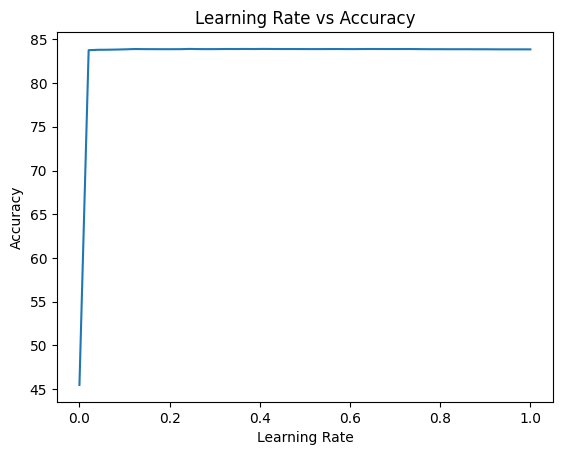

0.24489796673469383

In [177]:
learning_range = np.linspace(0.00000001, 1, 50)
accuracies = {}
for lr in learning_range:
    print(f"\nTraining with learning rate: {lr}")
    model = LogisticClassifier(learning_rate=lr)
    model.load(data, 'satisfaction')
    model.train()
    accuracies[lr] = model.evaluate()
    

plt.plot(learning_range, accuracies.values())
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.show()

best_lr = max(accuracies, key=accuracies.get)
best_lr

### Gaussian Discriminant Analysis (GDA) Classifier

The GaussianDiscriminantClassifier class implements a Gaussian Discriminant Analysis (GDA) classifier. GDA is a generative model that models the distribution of each class using a Gaussian distribution. It estimates the mean vector and covariance matrix for each class and uses these estimates to classify new instances based on the maximum posterior probability. It estimates the parameters of the Gaussian distribution for each class and uses them to compute the likelihood of a given input belonging to each class. The class with the highest likelihood is predicted as the output class. Generative algorithms differ from discriminative algorithms in that they model the distribution of the data rather than the decision boundary between classes, and then use Bayes' theorem to calculate the posterior probability of each class given the input features. Discriminative algorithms however, such as logistic regression, directly model the decision boundary between classes based on the input features.

#### Rationale for Choosing GDA
GDA is chosen for its ability to model the distribution of each class using a Gaussian distribution. It is particularly effective when the classes are normally distributed and have different covariance matrices. GDA is a generative model that estimates the parameters of the Gaussian distribution for each class and uses these estimates to classify new instances. It is computationally efficient and provides interpretable results, making it a popular choice for classification tasks. Even though the data is not normally distributed, GDA can still be effective in practice, as is demonstrated in the model evaluation. Additionally, the data is normalized, which can help mitigate the impact of non-normality on the GDA model.

#### Shortcomings of GDA
- Assumption of Gaussian Distribution: GDA assumes that the data for each class follows a Gaussian distribution. If this assumption is violated, the performance of the classifier may degrade.
- Covariance Matrices: GDA assumes that each class has its own covariance matrix. This assumption may not hold in practice, leading to suboptimal performance.
- Generative Model: GDA is a generative model that models the distribution of the data. This can be computationally expensive for high-dimensional data compared to discriminative models like logistic regression.
- Sensitivity to Outliers: GDA is sensitive to outliers in the data, as it models the distribution of the data. Outliers can significantly affect the estimated parameters of the Gaussian distribution.

#### Algorithm Overview
GDA models the probability density function of each class as a multivariate Gaussian distribution. The probability density function for class $ k $ is given by:

$$ p(x|y=k) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma^{-1} (x - \mu_k)\right) $$

where:
- $ x $ is the input features.
- $ d $ is the number of features.
- $ \mu_k $ is the mean vector of class $ k $.
- $ \Sigma $ is the covariance matrix of the features.
- $ |\Sigma| $ is the determinant of the covariance matrix.

The class prior $ p(y=k) $ is the proportion of samples in class $ k $ in the training set. The posterior probability of class $ k $ given by:

$$ p(y=k|x) = \frac{p(x|y=k) p(y=k)}{\sum_{j=1}^K p(x|y=j) p(y=j)} $$
where:
- $ K $ is the number of classes.

The discriminant score for class $ k $ is given by:

$$ \delta_k(x) = \log p(x|y=k) + \log p(y=k) $$

The class with the highest discriminant score is predicted as the output class.

The GaussianDiscriminantClassifier class implements the following methods:

- __init__(self, regularization=1e-6): Initializes the GDA classifier with an optional regularization parameter. The regularization parameter is used to add a small value to the diagonal of the covariance matrix to ensure it is invertible.

- load(self, data, target, frac=0.8, random_state=9, shuffle=True): Loads the dataset, splits it into training and testing sets, and assigns the resulting subsets to the instance attributes. This method ensures that the data is ready for training and evaluation.

- __compute_means(self): Computes the mean vectors for each class in the training set. This step is crucial for calculating the covariance matrix and class priors.

- __compute_covariance_and_priors(self): Computes the shared covariance matrix and class priors. These estimates are essential for calculating the discriminant scores.

- train(self): Trains the GDA model by computing the means, shared covariance, and class priors. It first checks if the training data has been loaded. Then, it computes the necessary statistics for classification.

- predict_class(self) -> np.array: Predicts the class labels for the test data based on the maximum posterior probability. It raises an error if the model has not been trained. The method returns the predicted class labels as a NumPy array.

- __compute_discriminant_score(self, x, label, inv_cov): Computes the discriminant score for a given sample ( x ) and class label. The discriminant score is used to determine the class with the highest posterior probability.

- evaluate(self, metric='accuracy') -> float: Evaluates the model's performance using the specified metric. It calculates the accuracy of the model by comparing the predicted class labels to the true labels and prints the results.

- predict(self, X: pd.DataFrame) -> np.array: Predicts the class labels for new input features. It projects the input data onto the top eigenvectors and finds the nearest class mean for each sample. This method returns the predicted class labels as a NumPy array.

In [178]:
import numpy as np
from sklearn.model_selection import train_test_split

class GaussianDiscriminantClassifier:
    """
    This class implements a Gaussian Discriminant Analysis (GDA) classifier.
    It estimates each class's mean vector and covariance matrix, assuming a Gaussian distribution.

    Attributes:
    -----------
    means : dict
        Dictionary storing the mean vectors for each class.
    covariance : np.ndarray
        Shared covariance matrix for all classes.
    priors : dict
        Dictionary storing the prior probabilities for each class.
    X_train : pd.DataFrame
        Training feature data.
    y_train : pd.Series
        Training target data.
    X_test : pd.DataFrame
        Testing feature data.
    y_test : pd.Series
        Testing target data.
    regularization : float
        Regularization term to ensure numerical stability.
    Methods:
    --------
    load(data, target, frac=0.8, random_state=9, shuffle=True):
    __compute_means():
    __compute_covariance_and_priors():
    train():
    predict_class() -> np.array:
    __compute_discriminant_score(x, label, inv_cov):
    evaluate(metric='accuracy') -> float:
    predict(X: pd.DataFrame) -> np.array:
    """
    
    def __init__(self, regularization=1e-6):
        self.means = None  
        self.covariance = None  
        self.priors = None  
        self.X_train, self.y_train = None, None
        self.X_test, self.y_test = None, None
        self.regularization = regularization
    
    def load(self, data, target, frac=0.8, random_state=9, shuffle=True):
        """
        Splits the data into training and testing sets.
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            data.drop(target, axis=1),
            data[target],
            test_size=1 - frac,
            random_state=random_state,
            shuffle=shuffle
        )
    
    def __compute_means(self):
        """
        Computes the mean vectors for each class in the training set.
        """
        class_labels = np.unique(self.y_train)
        self.means = {label: np.mean(self.X_train[self.y_train == label], axis=0) for label in class_labels}
    
    def __compute_covariance_and_priors(self):
        """
        Computes the shared covariance matrix and class priors.
        Assumes shared covariance across classes (as required for GDA).
        """
        n_samples, n_features = self.X_train.shape
        overall_covariance = np.zeros((n_features, n_features))
        for label, mean_vec in self.means.items():
            class_data = self.X_train[self.y_train == label]
            centered_data = class_data - mean_vec
            class_covariance = centered_data.T @ centered_data
            overall_covariance += class_covariance
        
        self.covariance = overall_covariance / (n_samples - len(self.means))
        
        self.priors = {
            label: len(self.X_train[self.y_train == label]) / n_samples for label in self.means.keys()
        }
    
    def train(self):
        """
        Trains the model by computing means, shared covariance, and class priors.
        """
        if self.X_train is None or self.y_train is None:
            raise ValueError("Training data not loaded.")
        
        self.__compute_means()
        self.__compute_covariance_and_priors()
    
    def predict_class(self) -> np.array:
        """
        Predicts the class for each instance in the test set based on maximum posterior probability.
        """
        if self.covariance is None or self.means is None:
            raise ValueError("Model not trained.")
        
        inv_cov = np.linalg.inv(self.covariance + self.regularization * np.eye(self.covariance.shape[0]))
        predictions = []
        for x in self.X_test.values:
            class_scores = {
                label: self.__compute_discriminant_score(x, label, inv_cov) for label in self.means.keys()
            }
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)
    
    def __compute_discriminant_score(self, x, label, inv_cov):
        """
        Computes the discriminant score for a given sample x and class label.
        """
        mean_vec = self.means[label]
        prior = self.priors[label]
        score = -0.5 * ((x - mean_vec).T @ inv_cov @ (x - mean_vec))
        score += np.log(prior)
        return score
    
    def evaluate(self, metric='accuracy') -> float:
        """
        Evaluates the model on the test set and prints the accuracy.
        """
        y_pred = self.predict_class()
        if metric == 'accuracy':
            model_accuracy = np.mean(y_pred == self.y_test) * 100
            majority_class = np.bincount(self.y_test).argmax()
            baseline_accuracy = np.mean(self.y_test == majority_class) * 100
            
            print(f"Model Accuracy: {model_accuracy:.2f}%")
            print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.2f}%")
            
            return model_accuracy
        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
    def predict(self, X: pd.DataFrame) -> np.array:
        """
        Predicts the class for each instance in the input data.
        """
        if self.covariance is None or self.means is None:
            raise ValueError("Model not trained.")
        
        inv_cov = np.linalg.inv(self.covariance + self.regularization * np.eye(self.covariance.shape[0]))
        predictions = []
        for x in X.values:
            class_scores = {
                label: self.__compute_discriminant_score(x, label, inv_cov) for label in self.means.keys()
            }
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        
        return np.array(predictions)

### Custom Ensemble Classifier

The CustomEnsemble class implements an ensemble classifier that combines three different models: Gaussian Discriminant Analysis (GDA), Linear Discriminant Analysis (LDA), and Logistic Regression (LR). Ensemble methods leverage the strengths of multiple models to improve overall performance and robustness. By combining the predictions of these models, the ensemble aims to achieve better accuracy and generalization compared to any individual model.

#### Rationale for Creating an Ensemble Model
Ensemble methods are known for their ability to improve predictive performance by combining the strengths of multiple models. By aggregating the predictions of different models, ensemble methods can reduce overfitting, increase robustness, and enhance generalization. The ensemble model is designed to leverage the complementary strengths of GDA, LDA, and LR to achieve higher accuracy and predictive power. Each base model contributes its unique perspective and expertise to the final prediction, resulting in a more reliable and accurate classification. Specfically:
- Gaussian Discriminant Analysis (GDA): GDA is effective when the data follows a Gaussian distribution and can handle both binary and multiclass classification problems. However, it assumes that all classes share the same covariance matrix, which may not always hold.
- Linear Discriminant Analysis (LDA): LDA is useful for dimensionality reduction and classification, particularly when the classes are linearly separable. It also assumes equal covariance matrices for all classes.
- Logistic Regression (LR): Logistic Regression is a discriminative model that is effective for binary classification tasks. It models the probability of the target variable based on the input features and does not assume any specific distribution for the data.
By combining these models, the ensemble can leverage the strengths of each model and provide a more accurate classification.

#### Shortcomings
- Complexity: The ensemble model is more complex than individual models, requiring more computational resources for training and prediction.
- Interpretability: The ensemble model may be less interpretable compared to individual models, as it combines multiple models with different underlying assumptions and mechanisms.

#### Algorithm Overview
The ensemble classifier combines the predictions of GDA, LDA, and LR models using a majority voting scheme. Each base model independently predicts the class label for a given input, and the ensemble model aggregates these predictions to make the final decision. The majority voting scheme selects the class label that receives the most votes from the base models. A tie is impossible in this case as there are three models. The ensemble classifier is designed to improve the overall accuracy of the classification by leveraging the diverse perspectives of the base models.

In [179]:
class CustomEnsemble:
    """
    A custom ensemble classifier that combines Gaussian Discriminant Analysis (GDA),
    Linear Discriminant Analysis (LDA), and Logistic Regression (LR) models.
    Attributes:
        gda (GaussianDiscriminantClassifier): Instance of Gaussian Discriminant Analysis classifier.
        lda (LinearDiscriminantClassifier): Instance of Linear Discriminant Analysis classifier.
        lr (LogisticClassifier): Instance of Logistic Regression classifier.
        X_train (pd.DataFrame): Training feature set.
        y_train (pd.Series): Training target set.
        X_test (pd.DataFrame): Testing feature set.
        y_test (pd.Series): Testing target set.
        data (pd.DataFrame): The entire dataset.
        target (str): The name of the target column in the dataset.
        frac (float): Fraction of the dataset to be used for training.
        random_state (int): Random seed for reproducibility.
        shuffle (bool): Whether to shuffle the dataset before splitting.
    Methods:
        load(data, target, frac=0.8, random_state=9, shuffle=True):
            Loads the dataset and splits it into training and testing sets.
        train():
            Trains the GDA, LDA, and LR models on the training data.
        predict_class() -> np.array:
            Predicts the class labels for the test set using majority voting.
        evaluate(metric='accuracy') -> float:
            Evaluates the ensemble model on the test set using the specified metric.
        predict(X: pd.DataFrame) -> np.array:
            Predicts the class labels for the given feature set using majority voting.
    """
    def __init__(self, num_components=1, learning_rate=0.01):
        self.gda = GaussianDiscriminantClassifier()
        self.lda = LinearDiscriminantClassifier(num_components=num_components)
        self.lr = LogisticClassifier(learning_rate=learning_rate)
        self.X_train, self.y_train = None, None
        self.X_test, self.y_test = None, None
        self.data = None
        self.target = None
        self.frac = None
        self.random_state = None
        self.shuffle = None

    def load(self, data, target, frac=0.8, random_state=9, shuffle=True):
        self.data = data
        self.target = target
        self.frac = frac
        self.random_state = random_state
        self.shuffle = shuffle

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            data.drop(target, axis=1),
            data[target],
            test_size=1 - frac,
            random_state=random_state,
            shuffle=shuffle
        )

        print("Data loaded successfully.")
        
    def train(self):
        print("Training Gaussian Discriminant Analysis model...")
        self.gda.load(self.data, self.target, self.frac, self.random_state, self.shuffle)
        self.gda.train()

        print("Training Linear Discriminant Analysis model...")
        self.lda.load(self.data, self.target, self.frac, self.random_state, self.shuffle)
        self.lda.train()

        print("Training Logistic Regression model...")
        self.lr.load(self.data, self.target, self.frac, self.random_state, self.shuffle)
        self.lr.train()

        print("Models trained successfully.")

    def predict_class(self) -> np.array:
        gda_predictions = self.gda.predict_class()
        lda_predictions = self.lda.predict_class()
        lr_predictions = self.lr.predict_class()

        predictions = []
        for gda_pred, lda_pred, lr_pred in zip(gda_predictions, lda_predictions, lr_predictions):
            majority_vote = np.argmax(np.bincount([gda_pred, lda_pred, lr_pred]))
            predictions.append(majority_vote)
        
        return np.array(predictions)
    
    def evaluate(self, metric='accuracy') -> float:
        y_pred = self.predict_class()

        if metric == 'accuracy':
            model_accuracy = np.mean(y_pred == self.y_test) * 100
            majority_class = np.bincount(self.y_test).argmax()
            baseline_accuracy = np.mean(self.y_test == majority_class) * 100
            
            print(f"Model Accuracy: {model_accuracy:.2f}%")
            print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.2f}%")
            
            return model_accuracy

        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
    def predict(self, X: pd.DataFrame) -> np.array:
        gda_predictions = self.gda.predict(X)
        lda_predictions = self.lda.predict(X)
        lr_predictions = self.lr.predict(X)

        predictions = []
        for gda_pred, lda_pred, lr_pred in zip(gda_predictions, lda_predictions, lr_predictions):
            majority_vote = np.argmax(np.bincount([gda_pred, lda_pred, lr_pred]))
            predictions.append(majority_vote)
        
        return np.array(predictions)

In [180]:
cmodel = CustomEnsemble(num_components=1, learning_rate=0.05)
cmodel.load(data, 'satisfaction')
cmodel.train()
accuracy = cmodel.evaluate()

Data loaded successfully.
Training Gaussian Discriminant Analysis model...
Training Linear Discriminant Analysis model...
Training Logistic Regression model...
Early stopping at iteration 6015
Models trained successfully.
Model Accuracy: 84.05%
Baseline Accuracy (Majority Class): 54.51%


## Testing the Model

Testing the Logistic Regression model, the Linear Discriminant Analysis model, and the Gaussian Discriminant Analysis model on the test set. The accuracy of each model is calculated and compared. The ensemble model is also tested on the test set, and its accuracy is calculated. The performance of the ensemble model is compared to the individual models to evaluate the effectiveness of the ensemble approach.

In [182]:
lr = LogisticClassifier(learning_rate=best_lr)
lr.load(data, 'satisfaction')
lr.train()
lr_accuracy = lr.evaluate()
print(f"Logistic Regression Model Accuracy: {lr_accuracy:.2f}%")

Early stopping at iteration 2176
Model Accuracy: 83.90%
Baseline Accuracy (Majority Class): 54.51%
Logistic Regression Model Accuracy: 83.90%


In [183]:
lda = LinearDiscriminantClassifier()
lda.load(data, 'satisfaction')
lda.train()
lda_accuracy = lda.evaluate()
print(f"Linear Discriminant Analysis Model Accuracy: {lda_accuracy:.2f}%")

Model Accuracy: 84.24%
Baseline Accuracy (Majority Class): 54.51%
Linear Discriminant Analysis Model Accuracy: 84.24%


In [184]:
gda = GaussianDiscriminantClassifier()
gda.load(data, 'satisfaction')
gda.train()
gda_accuracy = gda.evaluate()
print(f"Gaussian Discriminant Analysis Model Accuracy: {gda_accuracy:.2f}%")

Model Accuracy: 83.91%
Baseline Accuracy (Majority Class): 54.51%
Gaussian Discriminant Analysis Model Accuracy: 83.91%


In [181]:
classifier = CustomEnsemble(num_components=1, learning_rate=best_lr)
classifier.load(data, 'satisfaction')
classifier.train()
accuracy = classifier.evaluate()
print(f"Accuracy: {accuracy:.2f}%")

Data loaded successfully.
Training Gaussian Discriminant Analysis model...
Training Linear Discriminant Analysis model...
Training Logistic Regression model...
Early stopping at iteration 2176
Models trained successfully.
Model Accuracy: 84.05%
Baseline Accuracy (Majority Class): 54.51%
Accuracy: 84.05%
